In [5]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)

df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
1,190001004673,2019,1501204,Baião,15,PA,22,M,1,1,...,A,A,A,B,B,A,B,B,A,A
2,190001004916,2019,1501725,Brasil Novo,15,PA,36,F,2,1,...,A,A,A,B,A,A,D,A,B,B
3,190001005169,2019,1500107,Abaetetuba,15,PA,24,M,1,3,...,A,A,A,B,A,A,D,A,A,A
4,190001005174,2019,1501402,Belém,15,PA,19,F,1,1,...,B,A,A,B,B,A,E,B,C,B


In [28]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [7]:
def subgrupo(x):
    if x =='A':
        return 0
    if any((x =='B',x=='C',x=='D',x=='E')):
        return 1
    if any((x=='F',x=='G',x=='H',x=='I')):
        return 2
    if any((x=='J',x=='K',x=='L',x=='M')):
        return 3
    if any((x=='N',x=='O',x=='P',x=='Q')):
        return 4
    
df['Subgrupo'] = df['Q006'].apply(subgrupo)
df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Subgrupo
0,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,A,A,D,B,B,D,A,C,B,1
1,190001004673,2019,1501204,Baião,15,PA,22,M,1,1,...,A,A,B,B,A,B,B,A,A,0
2,190001004916,2019,1501725,Brasil Novo,15,PA,36,F,2,1,...,A,A,B,A,A,D,A,B,B,1
3,190001005169,2019,1500107,Abaetetuba,15,PA,24,M,1,3,...,A,A,B,A,A,D,A,A,A,1
4,190001005174,2019,1501402,Belém,15,PA,19,F,1,1,...,A,A,B,B,A,E,B,C,B,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50769,190006119964,2019,2702801,Flexeiras,27,AL,20,M,1,3,...,A,A,B,A,A,B,A,A,A,0
50770,190006119999,2019,2901007,Amargosa,29,BA,18,M,1,1,...,A,A,B,A,A,D,A,A,A,1
50771,190006120093,2019,3170404,Unaí,31,MG,20,F,1,2,...,A,A,B,A,A,D,A,A,A,1
50772,190006120095,2019,3138203,Lavras,31,MG,24,F,1,1,...,A,B,B,A,B,D,B,B,B,2


In [8]:
# 	Nenhuma renda. 0
# Vou comparar com o Q

# B	Até R$ 998,00
# C	De R$ 998,01 até R$ 1.497,00.
# D	De R$ 1.497,01 até R$ 1.996,00.
# E	De R$ 1.996,01 até R$ 2.495,00.

# F	De R$ 2.495,01 até R$ 2.994,00.
# G	De R$ 2.994,01 até R$ 3.992,00.
# H	De R$ 3.992,01 até R$ 4.990,00.
# I	De R$ 4.990,01 até R$ 5.988,00.

# J	De R$ 5.988,01 até R$ 6.986,00.
# K	De R$ 6.986,01 até R$ 7.984,00.
# L	De R$ 7.984,01 até R$ 8.982,00.
# M	De R$ 8.982,01 até R$ 9.980,00.

# N	De R$ 9.980,01 até R$ 11.976,00.
# O	De R$ 11.976,01 até R$ 14.970,00.
# P	De R$ 14.970,01 até R$ 19.960,00.
# Q	Mais de R$ 19.960,00.


#Dropei valores nulos, assim como a média, notas (pessoas que n compareceram, ou zeraram a redação)
df = df.dropna()

#media
media = (df.NU_NOTA_CN+df.NU_NOTA_CH+df.NU_NOTA_LC+df.NU_NOTA_MT+df.NU_NOTA_REDACAO)/5
df['media'] = media

# Subgrupo 0

grupo_A = df.loc[df['Q006'] == 'A']

#Subgrupo 1
grupo_B = df.loc[df['Q006'] == 'B']
grupo_C = df.loc[df['Q006'] == 'C']
grupo_D = df.loc[df['Q006'] == 'D']
grupo_E = df.loc[df['Q006'] == 'E']


#Subgrupo 2
grupo_F = df.loc[df['Q006'] == 'F']
grupo_G = df.loc[df['Q006'] == 'G']
grupo_H = df.loc[df['Q006'] == 'H']
grupo_I = df.loc[df['Q006'] == 'I']

#Subgrupo3
grupo_J = df.loc[df['Q006'] == 'J']
grupo_K = df.loc[df['Q006'] == 'K']
grupo_L = df.loc[df['Q006'] == 'L']
grupo_M = df.loc[df['Q006'] == 'M']


#Subgrupo 

grupo_N = df.loc[df['Q006'] == 'N']
grupo_O = df.loc[df['Q006'] == 'O']
grupo_P = df.loc[df['Q006'] == 'P']
grupo_Q = df.loc[df['Q006'] == 'Q']



df.head()

<ipython-input-8-c3c3321d184d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['media'] = media


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Subgrupo,media
0,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,A,D,B,B,D,A,C,B,1,581.40
5,190001005178,2019,1500800,Ananindeua,15,PA,17,F,1,3,...,A,B,A,A,B,A,A,A,0,655.62
15,190001005887,2019,1502707,Conceição do Araguaia,15,PA,18,F,1,2,...,A,B,A,A,C,A,A,B,1,499.32
19,190001006052,2019,1506807,Santarém,15,PA,17,F,1,1,...,B,D,B,A,E,A,B,B,3,589.58
33,190001007206,2019,1508100,Tucuruí,15,PA,19,F,1,1,...,A,B,A,A,C,A,A,A,1,492.48


<AxesSubplot:xlabel='media', ylabel='Density'>

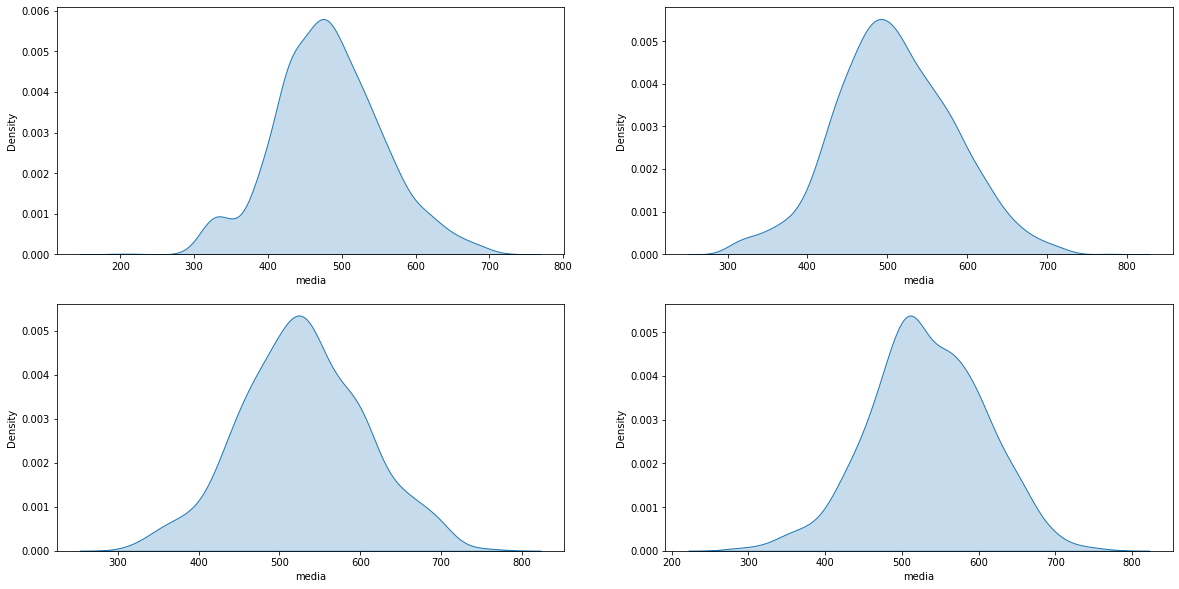

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10
sns.kdeplot(grupo_B['media'], ax=ax[0,0], shade=True) # plota a distribuiçao da coluna age
sns.kdeplot(grupo_C['media'], ax=ax[0,1], shade=True) # plota a distribuiçao da coluna age
sns.kdeplot(grupo_D['media'], ax=ax[1,0], shade=True) # plota a distribuiçao da coluna age
sns.kdeplot(grupo_E['media'], ax=ax[1,1], shade=True) # plota a distribuiçao da coluna age


<AxesSubplot:xlabel='media', ylabel='Density'>

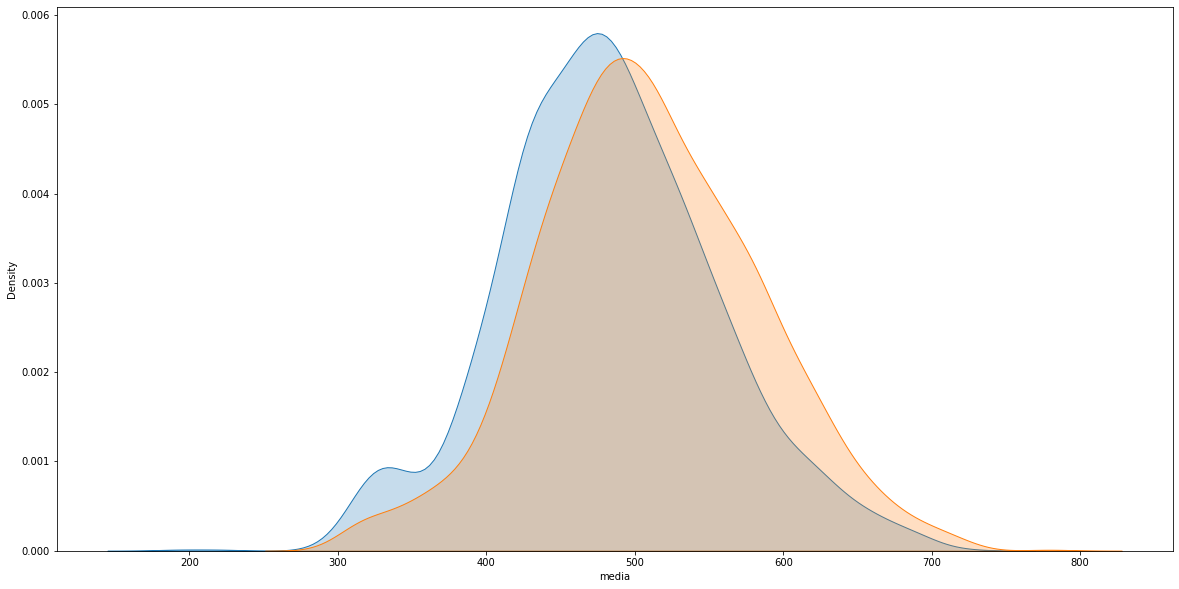

In [10]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10
sns.kdeplot(grupo_B['media'], ax=ax, shade=True) # plota a distribuiçao da coluna age
sns.kdeplot(grupo_C['media'], ax=ax, shade=True) # plota a distribuiçao da coluna age


### GRÁFICO COMPARANDO OS SUBGRUPOS

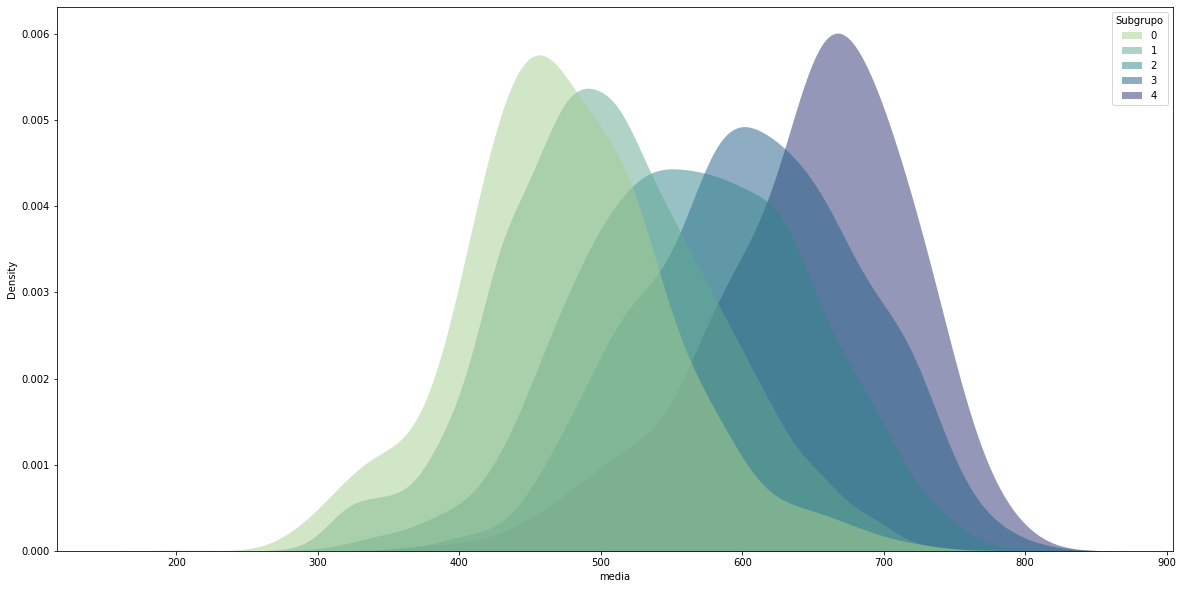

In [11]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10

sns.kdeplot(
   data=df, x="media", hue="Subgrupo",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()